In [21]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print("Completed")

Completed


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import scipy.misc 
import itertools 
import h5py 
import tensorflow 
import cv2 

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.models import load_model
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.regularizers import l1,l2 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,Input, SeparableConv2D, ZeroPadding2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D, AveragePooling2D 
from tensorflow.keras.layers import BatchNormalization, Input, Average
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from math import sqrt
from sklearn.metrics import confusion_matrix
from IPython.display import display 


# Produce stable results 
from numpy.random import seed
from tensorflow import random 
print("Completed")

Completed


In [23]:
import tensorflow
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())
print("Completed")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8033418795326783824
]
Completed


In [24]:

IMAGE_SIZE = [256,256]

train_path = 'ECG_Image_data/train'
test_path = 'ECG_Image_data/test'
print("Completed")

Completed


In [25]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)
print("Completed")

Completed


In [26]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(256,256),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(256,256),
                                            batch_size=32,
                                            class_mode='categorical')
print("Completed")

Found 99199 images belonging to 6 classes.
Found 24799 images belonging to 6 classes.
Completed


# **For InceptionV3 with optimiser adam**

In [27]:
# create the base pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)
print("Completed")

Completed


In [28]:
predictions = Dense(6, activation='softmax')(x2)

# this is the model we will train
models = Model(inputs=base_model.input, outputs=predictions)
models.summary()
print("Completed")

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
for layer in base_model.layers:
    layer.trainable = False

print("Completed")


Completed


In [11]:
models.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = models.fit_generator(train_set, validation_data=test_set, epochs=10, steps_per_epoch=100, validation_steps=100,callbacks=[callback])

print("Completed")

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 477s 5s/step - loss: 0.4205 - accuracy: 0.8838 - val_loss: 0.1439 - val_accuracy: 0.9719
Epoch 2/10
100/100 [==============================] - 460s 5s/step - loss: 0.1214 - accuracy: 0.9778 - val_loss: 0.0874 - val_accuracy: 0.9825
Epoch 3/10
100/100 [==============================] - 460s 5s/step - loss: 0.0794 - accuracy: 0.9859 - val_loss: 0.0700 - val_accuracy: 0.9828
Epoch 4/10
100/100 [==============================] - 519s 5s/step - loss: 0.0581 - accuracy: 0.9884 - val_loss: 0.0632 - val_accuracy: 0.9881
Epoch 5/10
100/100 [==============================] - 513s 5s/step - loss: 0.0476 - accuracy: 0.9906 - val_loss: 0.0379 - val_accuracy: 0.9919
Epoch 6/10
100/100 [==============================] - 516s 5s/step - loss: 0.0400 - accuracy: 0.9919 - val_loss: 0.0337 - val_accuracy: 0.9919
Epoch 7/10
100/100 [==============================] - 511s 5s/step - loss: 0.0376 - accuracy: 0.9909 - val_loss: 0.0364 - val_accuracy: 0.9947

In [12]:
models.save('models.h5')

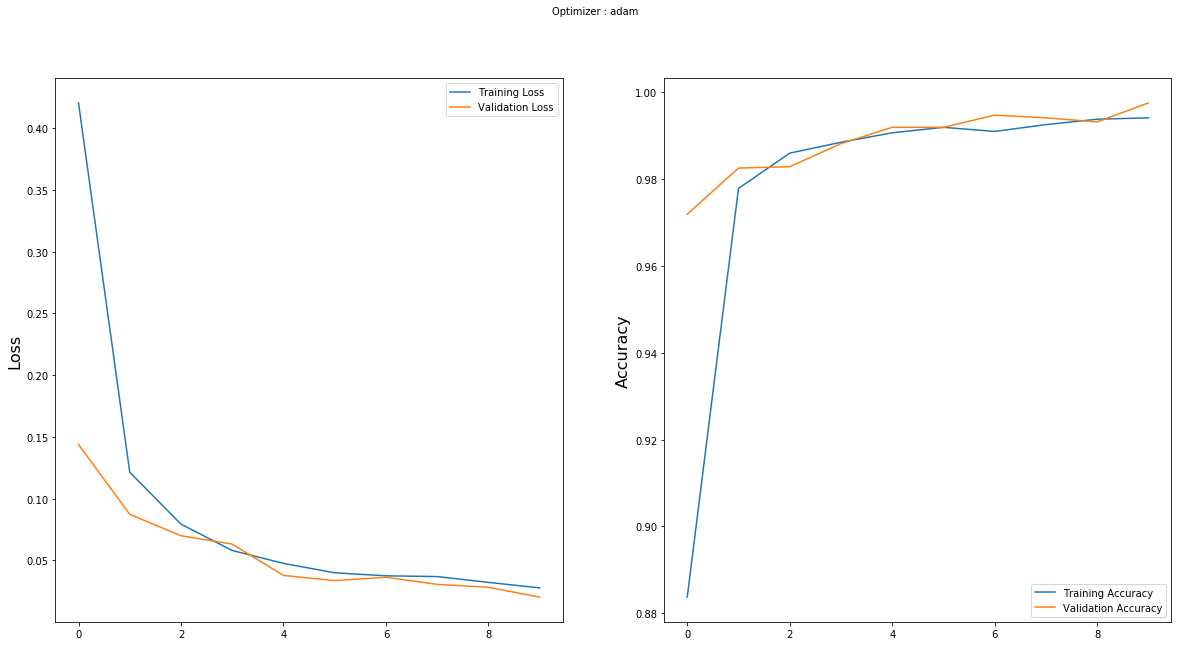

In [13]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **FOR VGG16**

In [14]:
vgg16=VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 25s 0us/step


In [15]:
x1= Flatten()(vgg16.output)
prediction1 = Dense(6, activation='softmax')(x1)
model1 = Model(inputs = vgg16.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 299, 299, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 299, 299, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 149, 149, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 149, 149, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 149, 149, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 74, 74, 128)       0   

In [16]:
r1 = model1.fit_generator(0.64)

Epoch 1/10
20/20 [==============================] - 657s 34s/step - loss: 2.6638 - accuracy: 0.6906 - val_loss: 0.9746 - val_accuracy: 0.7766
Epoch 2/10
20/20 [==============================] - 782s 40s/step - loss: 0.9788 - accuracy: 0.7719 - val_loss: 0.9190 - val_accuracy: 0.7641
Epoch 3/10
20/20 [==============================] - 785s 40s/step - loss: 0.8884 - accuracy: 0.7781 - val_loss: 0.8921 - val_accuracy: 0.7734
Epoch 4/10
20/20 [==============================] - 795s 40s/step - loss: 0.8939 - accuracy: 0.7719 - val_loss: 1.0418 - val_accuracy: 0.7437
Epoch 5/10
20/20 [==============================] - 801s 40s/step - loss: 0.8894 - accuracy: 0.7688 - val_loss: 0.9235 - val_accuracy: 0.7437
Epoch 6/10
20/20 [==============================] - 802s 41s/step - loss: 0.7642 - accuracy: 0.7984 - val_loss: 0.3531 - val_accuracy: 0.8562
Epoch 7/10
20/20 [==============================] - 813s 41s/step - loss: 0.4358 - accuracy: 0.8516 - val_loss: 0.4151 - val_accuracy: 0.8188
Epoch 

In [17]:
model1.save('vgg16.h5')

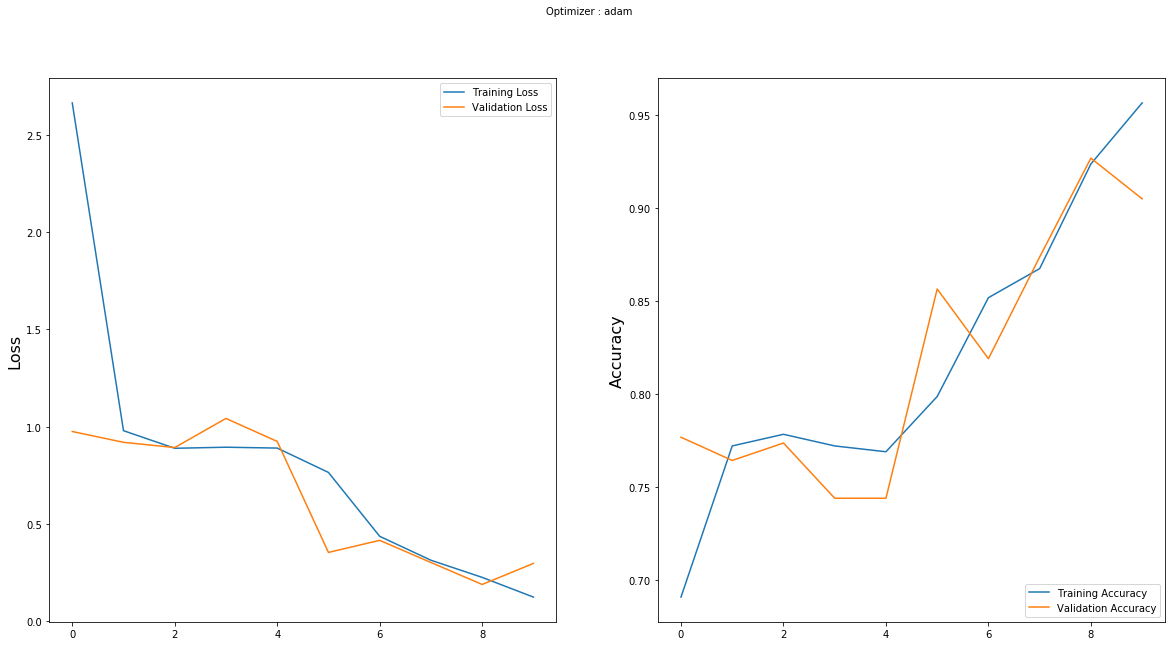

In [18]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **VGG19**

In [19]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
vgg19=VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 35s 0us/step


In [20]:
x11= Flatten()(vgg19.output)
prediction11 = Dense(6, activation='softmax')(x11)
model11 = Model(inputs = vgg19.inputs, outputs = prediction11)
model11.summary()
model11.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 299, 299, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 299, 299, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 149, 149, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 149, 149, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 149, 149, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 74, 74, 128)       0   

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model11.fit_generator(train_set, validation_data=test_set, epochs=5, steps_per_epoch=20, validation_steps=20,callbacks=[callback])

Epoch 1/5
20/20 [==============================] - 912s 46s/step - loss: 1.5945 - accuracy: 0.7234 - val_loss: 0.8920 - val_accuracy: 0.7641
Epoch 2/5
20/20 [==============================] - 859s 43s/step - loss: 0.8547 - accuracy: 0.7828 - val_loss: 0.8996 - val_accuracy: 0.7594
Epoch 3/5
20/20 [==============================] - 928s 47s/step - loss: 0.9131 - accuracy: 0.7516 - val_loss: 0.9269 - val_accuracy: 0.7469
Epoch 4/5
20/20 [==============================] - 903s 46s/step - loss: 0.8515 - accuracy: 0.7781 - val_loss: 0.8419 - val_accuracy: 0.7781
Epoch 5/5
20/20 [==============================] - 944s 48s/step - loss: 0.6476 - accuracy: 0.7797 - val_loss: 0.4809 - val_accuracy: 0.7234


In [22]:
model11.save('vgg19.h5')

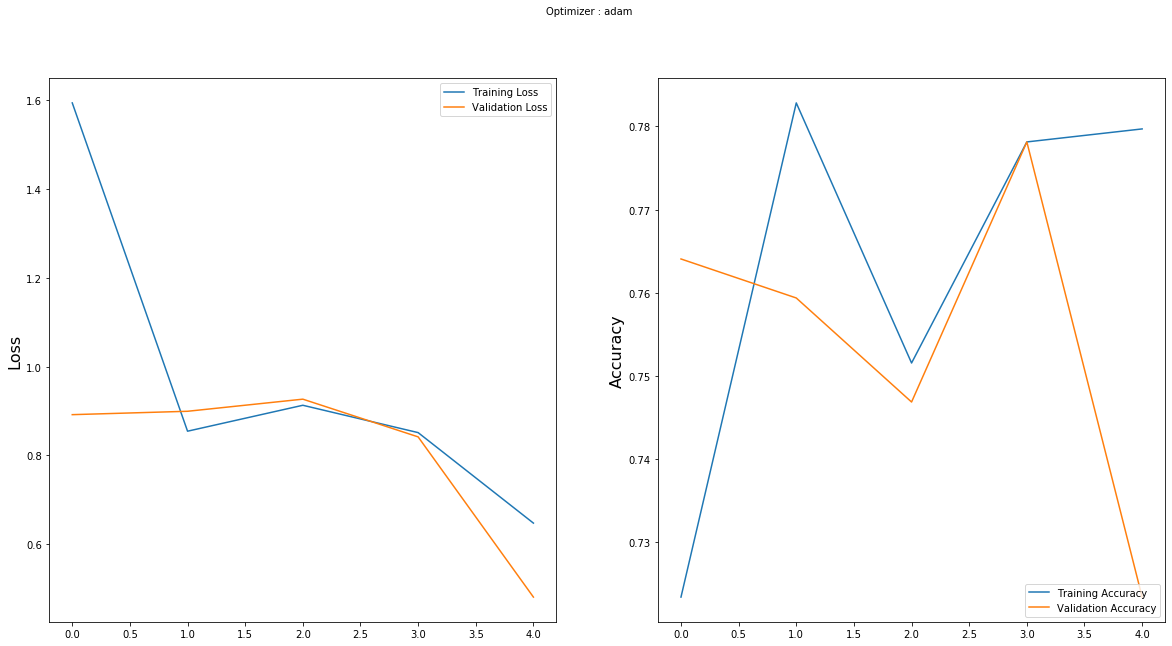

In [23]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **MobileNet**

In [24]:
from tensorflow.keras.applications import MobileNet, MobileNetV2
mob = MobileNet(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

17227776/17225924 [==============================] - 9s 1us/step


In [25]:
x1= Flatten()(mob.output)
prediction1 = Dense(6, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 150, 150, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 150, 150, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 150, 150, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 150, 150, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 150, 150, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 150, 150, 32)      0   

In [26]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=10, steps_per_epoch=10, validation_steps=10)

Epoch 1/10
10/10 [==============================] - 45s 4s/step - loss: 5.0315 - accuracy: 0.7688 - val_loss: 16.9414 - val_accuracy: 0.7344
Epoch 2/10
10/10 [==============================] - 59s 6s/step - loss: 0.2898 - accuracy: 0.9500 - val_loss: 16.8959 - val_accuracy: 0.7688
Epoch 3/10
10/10 [==============================] - 60s 6s/step - loss: 0.0769 - accuracy: 0.9781 - val_loss: 18.2188 - val_accuracy: 0.7625
Epoch 4/10
10/10 [==============================] - 50s 5s/step - loss: 0.0793 - accuracy: 0.9750 - val_loss: 17.6574 - val_accuracy: 0.7625
Epoch 5/10
10/10 [==============================] - 56s 6s/step - loss: 0.3247 - accuracy: 0.9500 - val_loss: 7.8614 - val_accuracy: 0.8469
Epoch 6/10
10/10 [==============================] - 55s 5s/step - loss: 0.2275 - accuracy: 0.9781 - val_loss: 34.4813 - val_accuracy: 0.7937
Epoch 7/10
10/10 [==============================] - 56s 6s/step - loss: 0.1403 - accuracy: 0.9656 - val_loss: 28.6764 - val_accuracy: 0.7750
Epoch 8/10
10/

In [27]:
model12.save('mobilenet.h5')

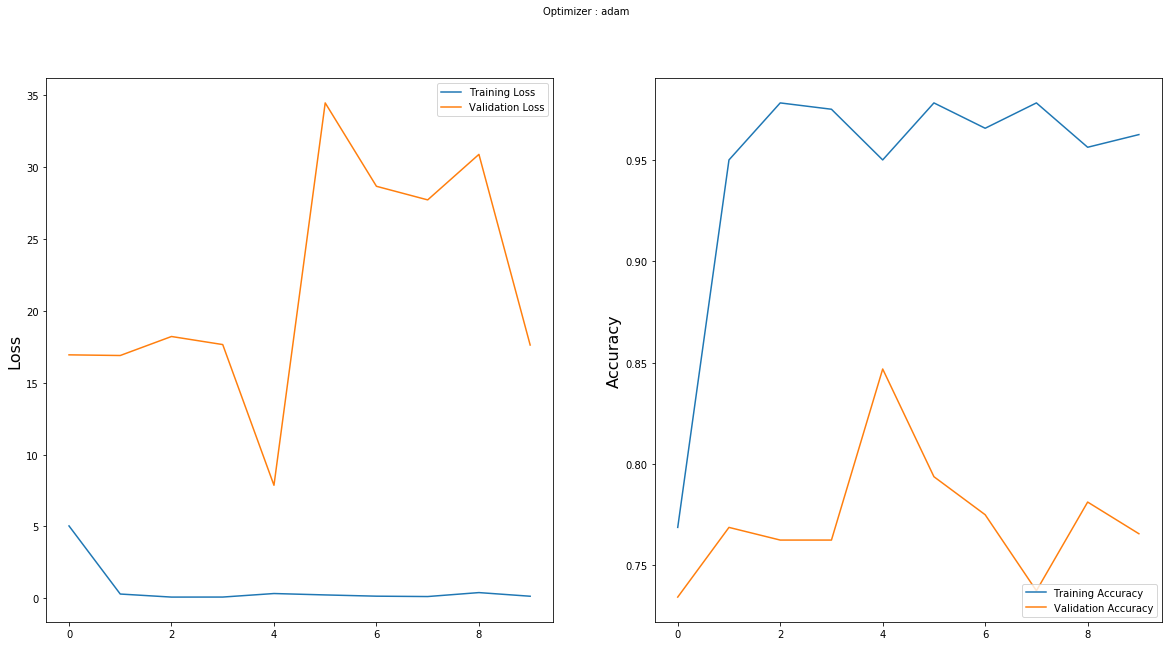

In [28]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ZFNet

In [29]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    
		tf.keras.layers.Conv2D(96, (7, 7), strides=(2, 2), activation='relu',
			input_shape=(299,299, 3)),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), activation='relu'),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),

		tf.keras.layers.MaxPooling2D(3, strides=2),

    tf.keras.layers.Flatten(),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(6, activation='softmax')
	])


In [30]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), \
              loss='categorical_crossentropy', \
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(5)])

In [31]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=1,min_lr=0.00001)

In [34]:
his = model.fit_generator(train_set, validation_data=test_set, epochs=10, steps_per_epoch=20, validation_steps=10)

Epoch 1/10


InvalidArgumentError:  Input to reshape is a tensor with 73728 values, but the requested shape requires a multiple of 6400
	 [[node sequential_1/flatten_1/Reshape (defined at <ipython-input-32-9aecb7ca2739>:1) ]] [Op:__inference_train_function_13409]

Function call stack:
train_function


In [33]:
model.save('zfnet.h5')

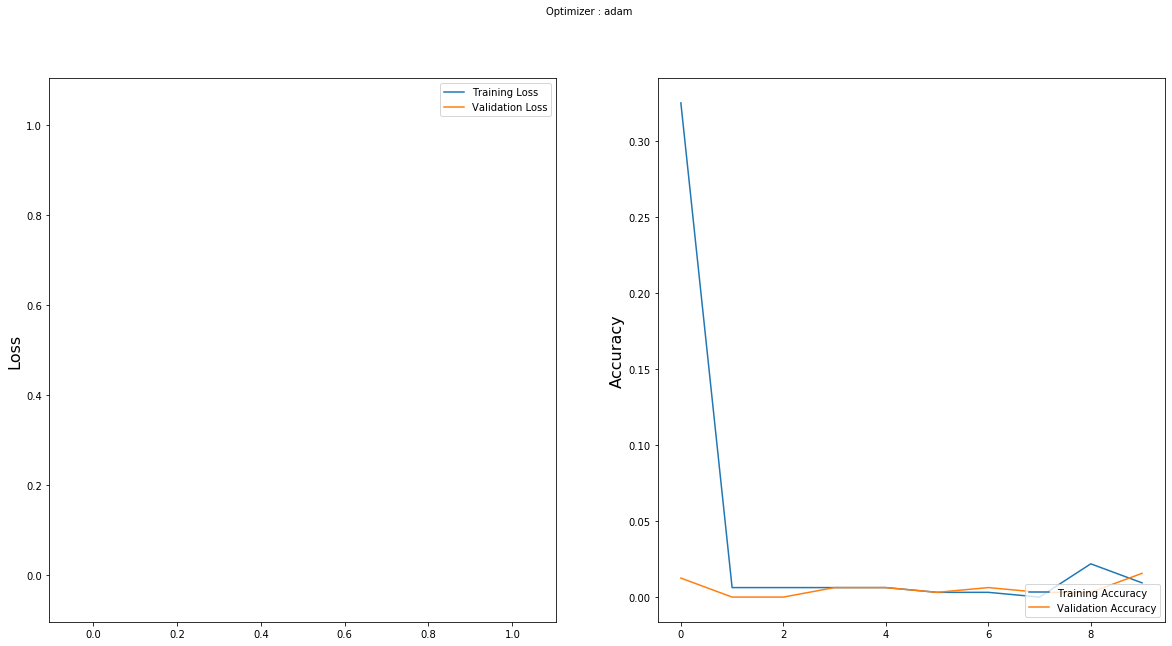

In [34]:
import matplotlib.pyplot as plt

x= his
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# AlexNet

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

In [11]:
np.random.seed(1000)

#Instantiation
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(299,299,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#Output Layer
model.add(Dense(6))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 75, 75, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 38, 38, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 38, 38, 256)       0

In [14]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [16]:
his = model.fit_generator(train_set, validation_data=test_set, epochs=10, steps_per_epoch=20, validation_steps=20)


Epoch 1/10


InvalidArgumentError:  Input to reshape is a tensor with 524288 values, but the requested shape requires a multiple of 25600
	 [[node sequential/flatten/Reshape (defined at C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\keras\layers\core.py:672) ]] [Op:__inference_train_function_5291]

Errors may have originated from an input operation.
Input Source operations connected to node sequential/flatten/Reshape:
 sequential/max_pooling2d_2/MaxPool (defined at C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\keras\layers\pooling.py:355)	
 sequential/flatten/Const (defined at C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\keras\layers\core.py:667)

Function call stack:
train_function


In [39]:
model.save('alexnet.h5')

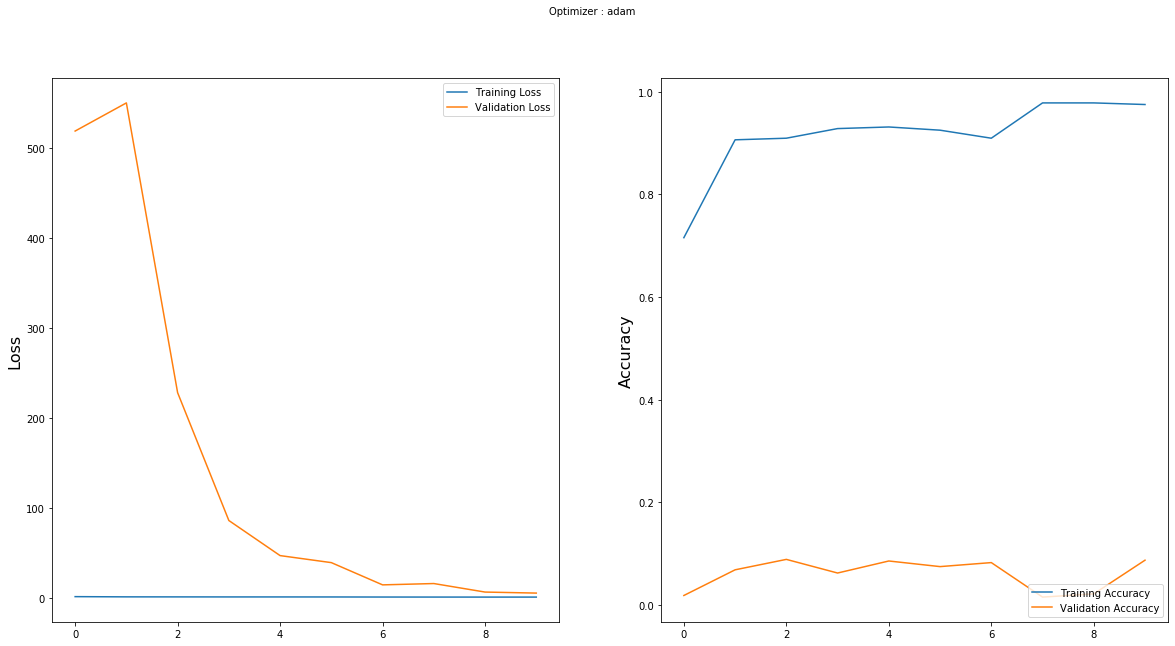

In [40]:
import matplotlib.pyplot as plt

x=his 
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Combination

In [9]:
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import Input
import tensorflow.keras.backend as K
from keras.layers import GlobalAveragePooling2D, Dense, Reshape, Lambda, LSTM,  merge,concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam 

In [45]:
import time
import numpy as np

np.random.seed(1337)

In [46]:
class CustomImageDataGenerator(ImageDataGenerator):
    """
    Because Xception utilizes a custom preprocessing method, the only way to utilize this
    preprocessing method using the ImageDataGenerator is to overload the standardize method.
    The standardize method gets applied to each batch before ImageDataGenerator yields that batch.
    """

    def standardize(self, x):
        """
        Taken from keras.applications.xception.preprocess_input
        """
        if self.featurewise_center:
            x /= 255.
            x -= 0.5
            x *= 2.
        return 

In [47]:
def get_training_generator(batch_size=128):
    train_data_dir = 'ECG_Image_data/train/'
    validation_data_dir = 'ECG_Image_data/test/'
    image_datagen = CustomImageDataGenerator(featurewise_center=True)

    train_generator = image_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size
    )

    val_generator = image_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        shuffle=False
    )

    return train_generator, val_generator

In [48]:
def rgb_to_grayscale(input):
    """Average out each pixel across its 3 RGB layers resulting in a grayscale image"""
    return K.mean(input, axis=3)


def rgb_to_grayscale_output_shape(input_shape):
    return input_shape[:-1]

In [49]:
batch_size_phase_one = 32
batch_size_phase_two = 16
nb_val_samples = 5000

nb_epochs = 30

img_width = 299
img_height = 299

In [50]:
# Setting tensorbord callback
now = time.strftime("%c")
tensorboard_callback = TensorBoard(log_dir='./logs/' + 'cnn_rnn ' + now, histogram_freq=0, write_graph=True,
                                   write_images=False)

In [51]:
# Loading dataset
print("Loading the dataset with batch size of {}...".format(batch_size_phase_one))
train_generator, val_generator = get_training_generator(batch_size_phase_one)
print("Dataset loaded")

Loading the dataset with batch size of 32...
Found 99199 images belonging to 6 classes.
Found 24799 images belonging to 6 classes.
Dataset loaded


# LSTM with CNN using Xception

In [52]:
print("Building model...")
input_tensor = Input(shape=(img_width, img_height, 3))
# Creating CNN
cnn_model = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)
# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = LSTM(2048, return_sequences=True)(x)
rnn_output = LSTM(2048)(x)


Building model...


ValueError: Unexpectedly found an instance of type `<class 'tensorflow.python.keras.engine.keras_tensor.KerasTensor'>`. Expected a symbolic tensor instance.

In [77]:
x = concatenate([cnn_bottleneck, rnn_output])

In [78]:
predictions = Dense(6, activation='softmax')(x)

In [80]:
model = Model(input_tensor,predictions)

In [88]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [89]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [106]:
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 3054s 61s/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0065
Epoch 2/2
50/50 [==============================] - 3026s 61s/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0065


In [107]:
model.save('lstm.h5')

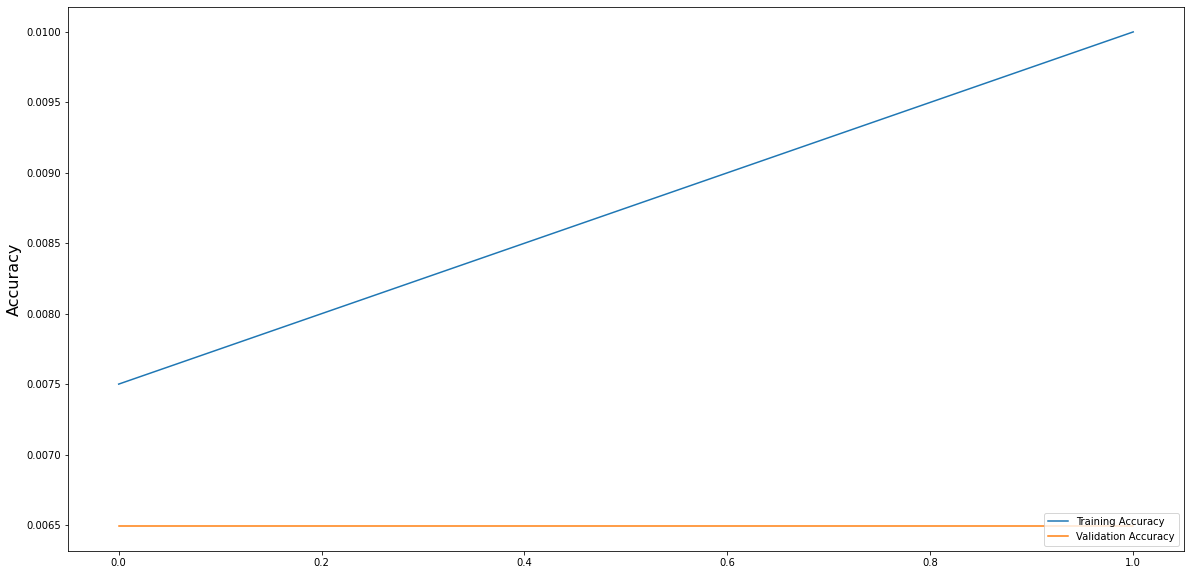

In [112]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# BiLSTM

In [7]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [10]:
# Creating CNN
cnn_model = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = Bidirectional(LSTM(2048, return_sequences=True))(x)
rnn_output = Bidirectional(LSTM(2048))(x)

NameError: name 'input_tensor' is not defined

In [93]:
x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [94]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [95]:
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [108]:
hist1 = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 566s 11s/step - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 567s 11s/step - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.1006


In [109]:
model.save('bilstm.h5')

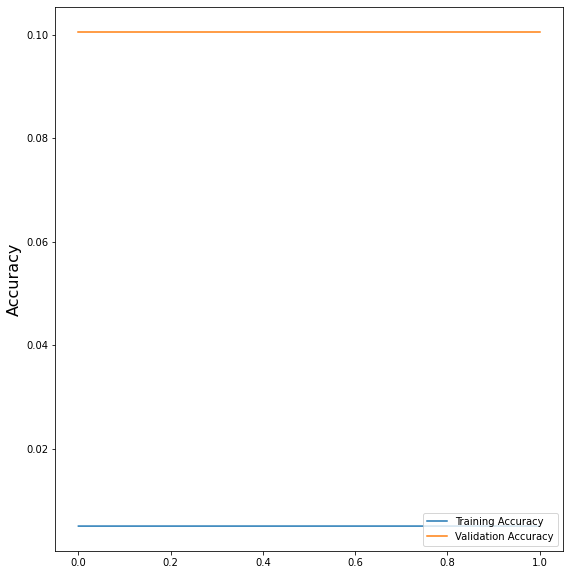

In [113]:
import matplotlib.pyplot as plt

x=hist1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# GRU

In [17]:
from keras.layers import Dense, Dropout, Embedding, GRU

In [98]:
# Creating CNN
cnn_model = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = GRU(2048, return_sequences=True)(x)
rnn_output = GRU(2048)(x)

In [99]:
x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [100]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [101]:
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

In [110]:
hist2 = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 557s 11s/step - loss: nan - accuracy: 0.0063 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 572s 11s/step - loss: nan - accuracy: 0.0056 - val_loss: nan - val_accuracy: 0.1006


In [111]:
model.save('gru.h5')

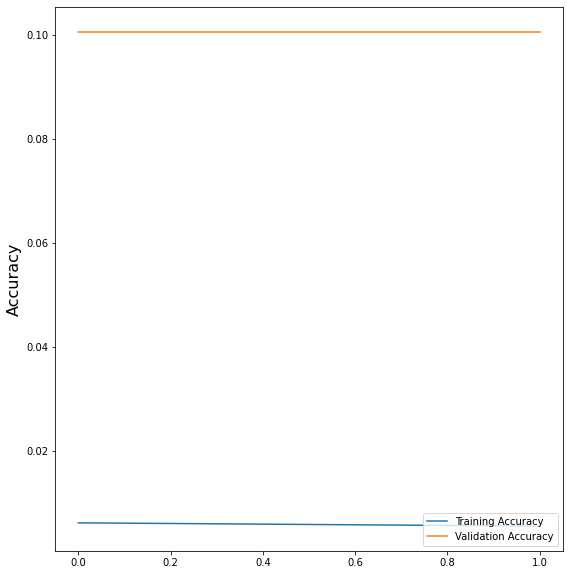

In [114]:
import matplotlib.pyplot as plt

x=hist2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [25]:
seed(1)
tensorflow.random.set_seed(1)

# Control Variables
batch_size = 128
num_epochs = 20

# Hybrid ZFNet + LSTM

In [26]:
# load efficientnet
import efficientnet.keras 
def ensemble():

    model_1 = load_model("zfnet.h5")
    model_1 = Model(inputs = model_1.inputs, outputs = model_1.outputs, name = 'ZFNET')

    model_2 = load_model("lstm.h5")
    model_2 = Model(inputs = model_2.inputs, outputs = model_2.outputs, name = 'LSTM')


    models = [model_1, model_2]


    models_input = Input(shape =(299,299,3))
    models_output = [model(models_input) for model in models]
    
    ensemble_output = Average()(models_output)

    simple_average = Model(inputs = models_input, outputs = ensemble_output, name = 'Ensemble')

    return simple_average

In [27]:
model = ensemble()
model.summary()

Model: "Ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
ZFNET (Functional)              (None, 6)            46750854    input_2[0][0]                    
__________________________________________________________________________________________________
LSTM (Functional)               (None, 6)            82541102    input_2[0][0]                    
__________________________________________________________________________________________________
average (Average)               (None, 6)            0           ZFNET[0][0]                      
                                                                 LSTM[0][0]                

In [28]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [29]:
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 697s 14s/step - loss: nan - accuracy: 0.0056 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 681s 14s/step - loss: nan - accuracy: 0.0044 - val_loss: nan - val_accuracy: 0.1006


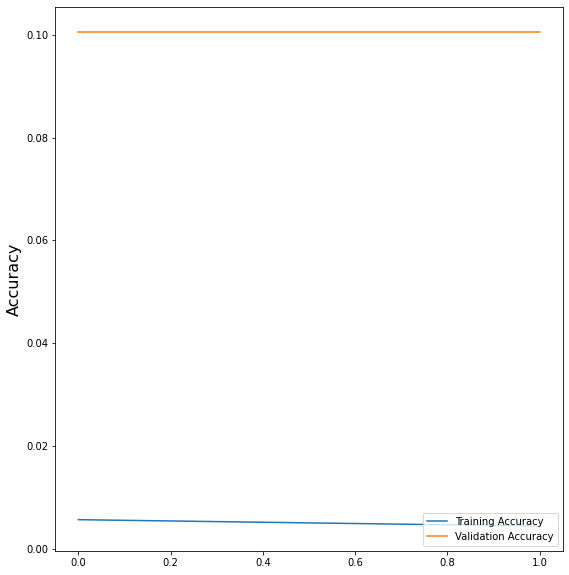

In [30]:
import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Hybrid ZFNet + BiLSTM

In [31]:
# load efficientnet
import efficientnet.keras 
def ensemble():

    model_1 = load_model("zfnet.h5")
    model_1 = Model(inputs = model_1.inputs, outputs = model_1.outputs, name = 'ZFNET')

    model_2 = load_model("bilstm.h5")
    model_2 = Model(inputs = model_2.inputs, outputs = model_2.outputs, name = 'BiLSTM')


    models = [model_1, model_2]


    models_input = Input(shape =(299,299,3))
    models_output = [model(models_input) for model in models]
    
    ensemble_output = Average()(models_output)

    simple_average = Model(inputs = models_input, outputs = ensemble_output, name = 'Ensemble')

    return simple_average

In [32]:
model = ensemble()
model.summary()

Model: "Ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
ZFNET (Functional)              (None, 6)            46750854    input_3[0][0]                    
__________________________________________________________________________________________________
BiLSTM (Functional)             (None, 6)            82541102    input_3[0][0]                    
__________________________________________________________________________________________________
average_1 (Average)             (None, 6)            0           ZFNET[0][0]                      
                                                                 BiLSTM[0][0]              

In [33]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [34]:
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 694s 14s/step - loss: nan - accuracy: 0.0044 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 697s 14s/step - loss: nan - accuracy: 0.0031 - val_loss: nan - val_accuracy: 0.1006


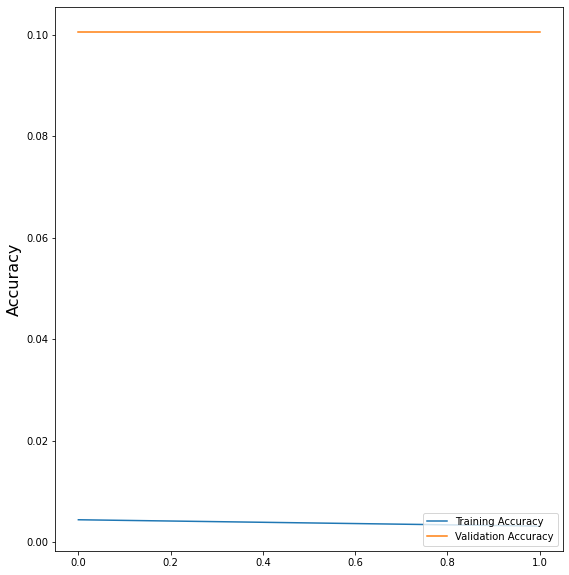

In [35]:
import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Hybrid ZFNet + GRU

In [36]:
# load efficientnet
import efficientnet.keras 
def ensemble():

    model_1 = load_model("zfnet.h5")
    model_1 = Model(inputs = model_1.inputs, outputs = model_1.outputs, name = 'ZFNET')

    model_2 = load_model("gru.h5")
    model_2 = Model(inputs = model_2.inputs, outputs = model_2.outputs, name = 'GRU')


    models = [model_1, model_2]


    models_input = Input(shape =(299,299,3))
    models_output = [model(models_input) for model in models]
    
    ensemble_output = Average()(models_output)

    simple_average = Model(inputs = models_input, outputs = ensemble_output, name = 'Ensemble')

    return simple_average

In [37]:
model = ensemble()
model.summary()

Model: "Ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
ZFNET (Functional)              (None, 6)            46750854    input_4[0][0]                    
__________________________________________________________________________________________________
GRU (Functional)                (None, 6)            82541102    input_4[0][0]                    
__________________________________________________________________________________________________
average_2 (Average)             (None, 6)            0           ZFNET[0][0]                      
                                                                 GRU[0][0]                 

In [38]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [39]:
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 696s 14s/step - loss: nan - accuracy: 0.0031 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 698s 14s/step - loss: nan - accuracy: 0.0056 - val_loss: nan - val_accuracy: 0.1006


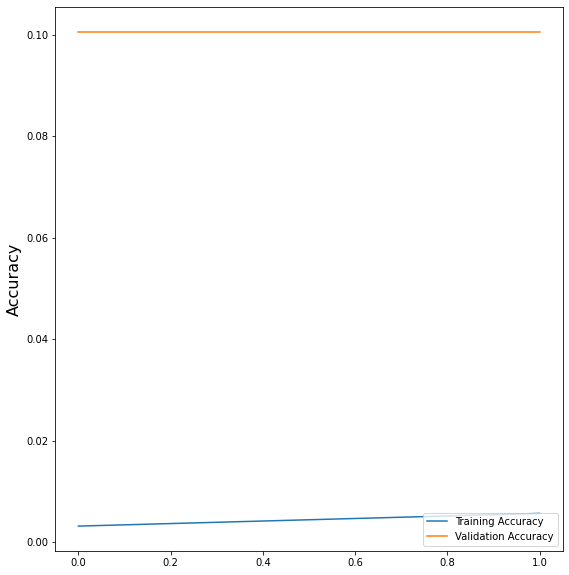

In [40]:
import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Hybrid AlexNet + LSTM

In [41]:
# load efficientnet
import efficientnet.keras 
def ensemble():

    model_1 = load_model("alexnet.h5")
    model_1 = Model(inputs = model_1.inputs, outputs = model_1.outputs, name = 'ALEXNET')

    model_2 = load_model("lstm.h5")
    model_2 = Model(inputs = model_2.inputs, outputs = model_2.outputs, name = 'LSTM')


    models = [model_1, model_2]


    models_input = Input(shape =(299,299,3))
    models_output = [model(models_input) for model in models]
    
    ensemble_output = Average()(models_output)

    simple_average = Model(inputs = models_input, outputs = ensemble_output, name = 'Ensemble')

    return simple_average

In [42]:
model = ensemble()
model.summary()

Model: "Ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
ALEXNET (Functional)            (None, 6)            129535510   input_5[0][0]                    
__________________________________________________________________________________________________
LSTM (Functional)               (None, 6)            82541102    input_5[0][0]                    
__________________________________________________________________________________________________
average_3 (Average)             (None, 6)            0           ALEXNET[0][0]                    
                                                                 LSTM[0][0]                

In [43]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [44]:
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 753s 15s/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 760s 15s/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.1006


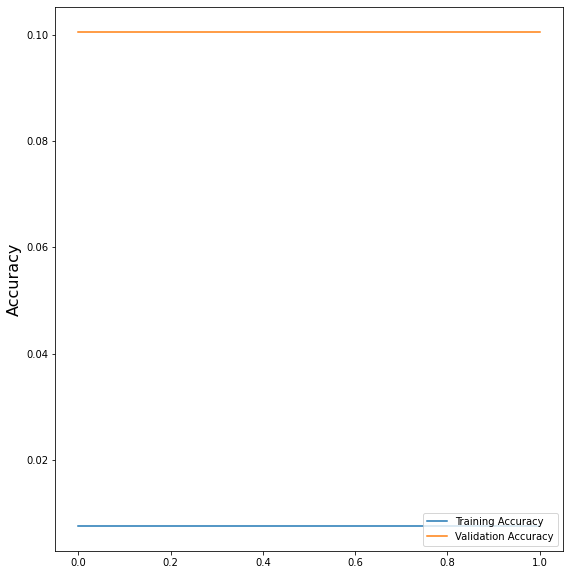

In [45]:
import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ALEXNET + BILSTM

In [46]:
# load efficientnet
import efficientnet.keras 
def ensemble():

    model_1 = load_model("alexnet.h5")
    model_1 = Model(inputs = model_1.inputs, outputs = model_1.outputs, name = 'ALEXNET')

    model_2 = load_model("bilstm.h5")
    model_2 = Model(inputs = model_2.inputs, outputs = model_2.outputs, name = 'BiLSTM')


    models = [model_1, model_2]


    models_input = Input(shape =(299,299,3))
    models_output = [model(models_input) for model in models]
    
    ensemble_output = Average()(models_output)

    simple_average = Model(inputs = models_input, outputs = ensemble_output, name = 'Ensemble')

    return simple_average

In [47]:
model = ensemble()
model.summary()

Model: "Ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
ALEXNET (Functional)            (None, 6)            129535510   input_6[0][0]                    
__________________________________________________________________________________________________
BiLSTM (Functional)             (None, 6)            82541102    input_6[0][0]                    
__________________________________________________________________________________________________
average_4 (Average)             (None, 6)            0           ALEXNET[0][0]                    
                                                                 BiLSTM[0][0]              

In [48]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [49]:
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 760s 15s/step - loss: nan - accuracy: 0.0094 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 762s 15s/step - loss: nan - accuracy: 0.0044 - val_loss: nan - val_accuracy: 0.1006


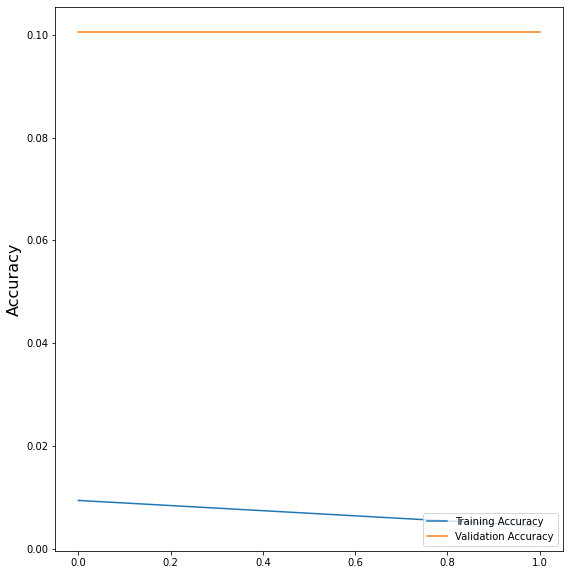

In [50]:
import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ALEXNET + GRU

In [51]:
# load efficientnet
import efficientnet.keras 
def ensemble():

    model_1 = load_model("alexnet.h5")
    model_1 = Model(inputs = model_1.inputs, outputs = model_1.outputs, name = 'ALEXNET')

    model_2 = load_model("gru.h5")
    model_2 = Model(inputs = model_2.inputs, outputs = model_2.outputs, name = 'GRU')


    models = [model_1, model_2]


    models_input = Input(shape =(299,299,3))
    models_output = [model(models_input) for model in models]
    
    ensemble_output = Average()(models_output)

    simple_average = Model(inputs = models_input, outputs = ensemble_output, name = 'Ensemble')

    return simple_average

In [52]:
model = ensemble()
model.summary()
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

Model: "Ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
ALEXNET (Functional)            (None, 6)            129535510   input_7[0][0]                    
__________________________________________________________________________________________________
GRU (Functional)                (None, 6)            82541102    input_7[0][0]                    
__________________________________________________________________________________________________
average_5 (Average)             (None, 6)            0           ALEXNET[0][0]                    
                                                                 GRU[0][0]                 

In [53]:
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 766s 15s/step - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 766s 15s/step - loss: nan - accuracy: 0.0037 - val_loss: nan - val_accuracy: 0.1006


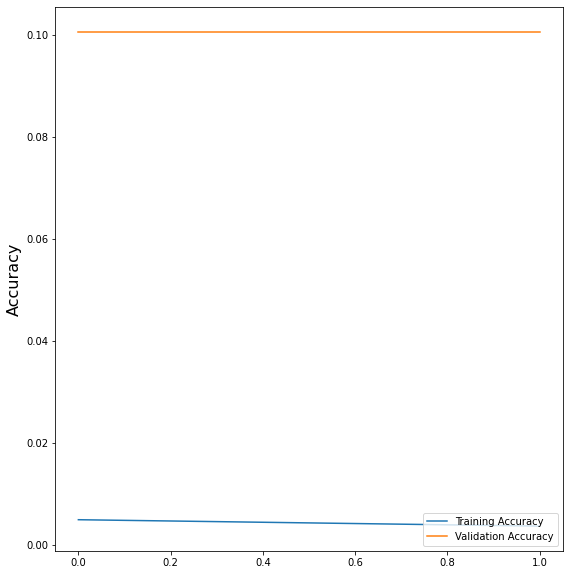

In [54]:
import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG16 + LSTM

In [55]:
from tensorflow.keras.applications.vgg16 import VGG16
# Creating CNN
cnn_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = LSTM(2048, return_sequences=True)(x)
rnn_output = LSTM(2048)(x)

x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [56]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 299, 299, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 299, 299, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 149, 149, 64) 0           block1_conv2[0][0]               
_______________________________________________________________________________________

In [57]:
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 909s 18s/step - loss: nan - accuracy: 0.0088 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 899s 18s/step - loss: nan - accuracy: 0.0081 - val_loss: nan - val_accuracy: 0.1006


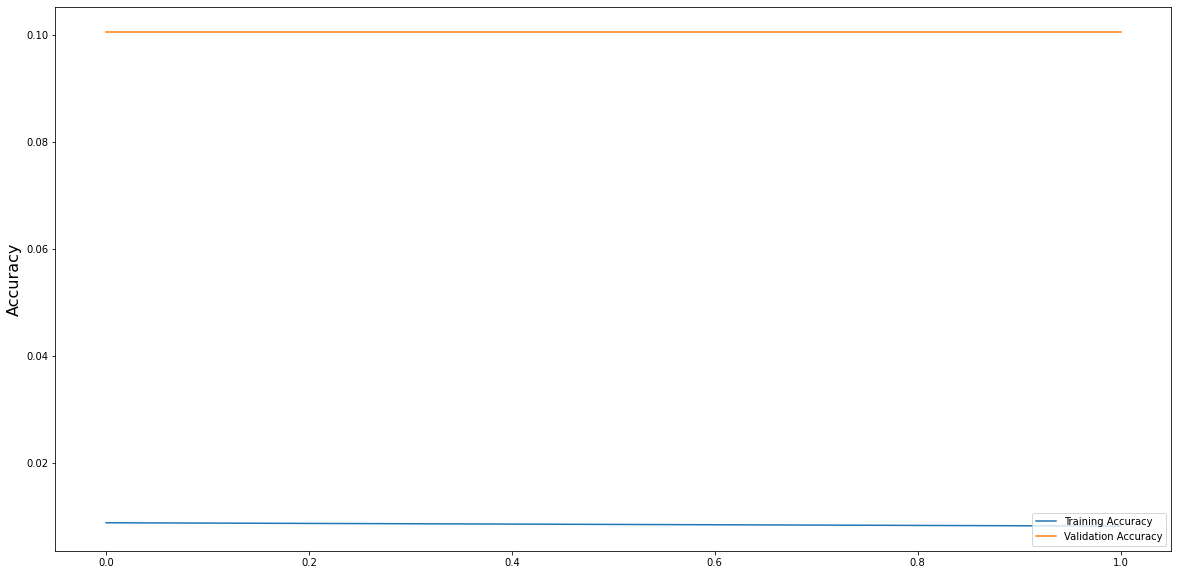

In [58]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG16 + BiLSTM

In [59]:
from tensorflow.keras.applications.vgg16 import VGG16
# Creating CNN
cnn_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = Bidirectional(LSTM(2048, return_sequences=True))(x)
rnn_output = Bidirectional(LSTM(2048))(x)

x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [60]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
model.summary()
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 299, 299, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 299, 299, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 149, 149, 64) 0           block1_conv2[0][0]               
_______________________________________________________________________________________

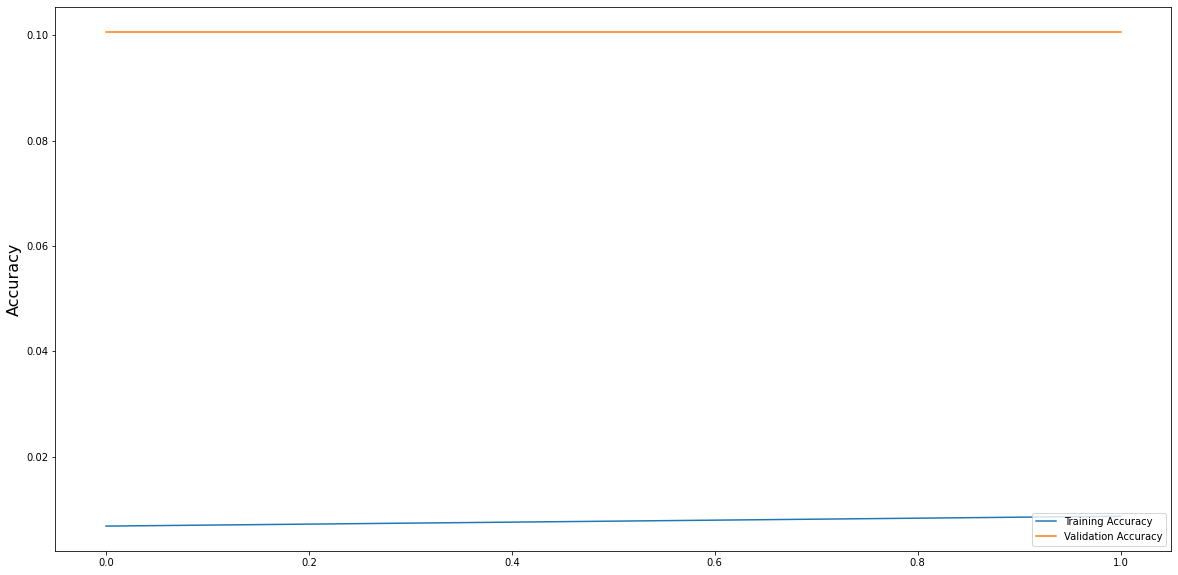

In [61]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG16 + GRU

In [62]:
from tensorflow.keras.applications.vgg16 import VGG16
# Creating CNN
cnn_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = GRU(2048, return_sequences=True)(x)
rnn_output = GRU(2048)(x)

x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [63]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
model.summary()
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 299, 299, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 299, 299, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 149, 149, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________

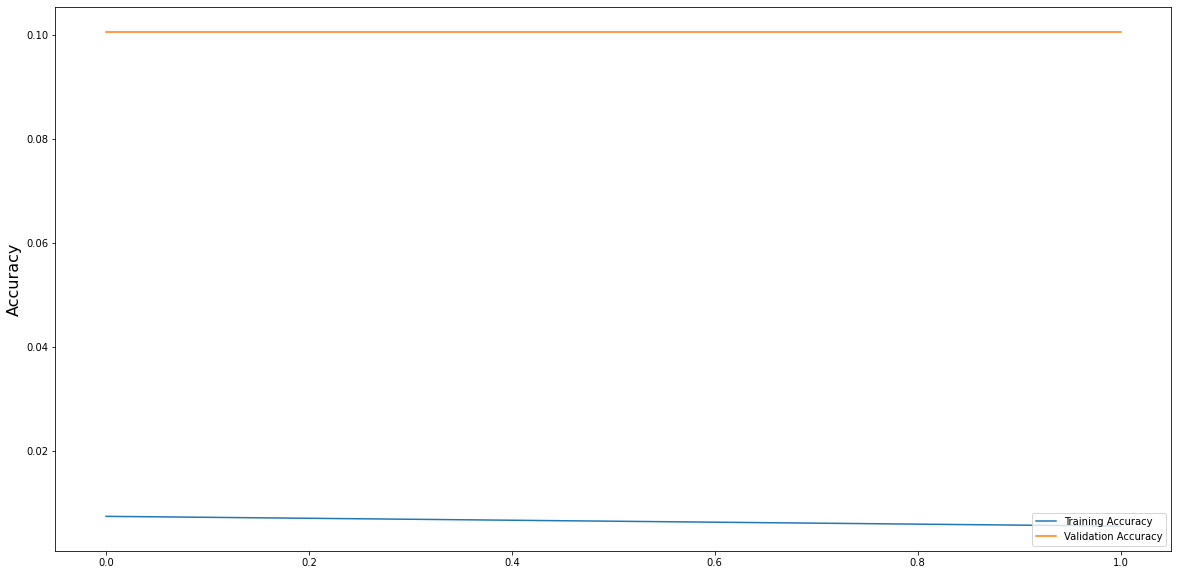

In [64]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG19 + LSTM

In [65]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
# Creating CNN
cnn_model = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = LSTM(2048, return_sequences=True)(x)
rnn_output = LSTM(2048)(x)

x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [66]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
model.summary()
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 299, 299, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 299, 299, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 149, 149, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________

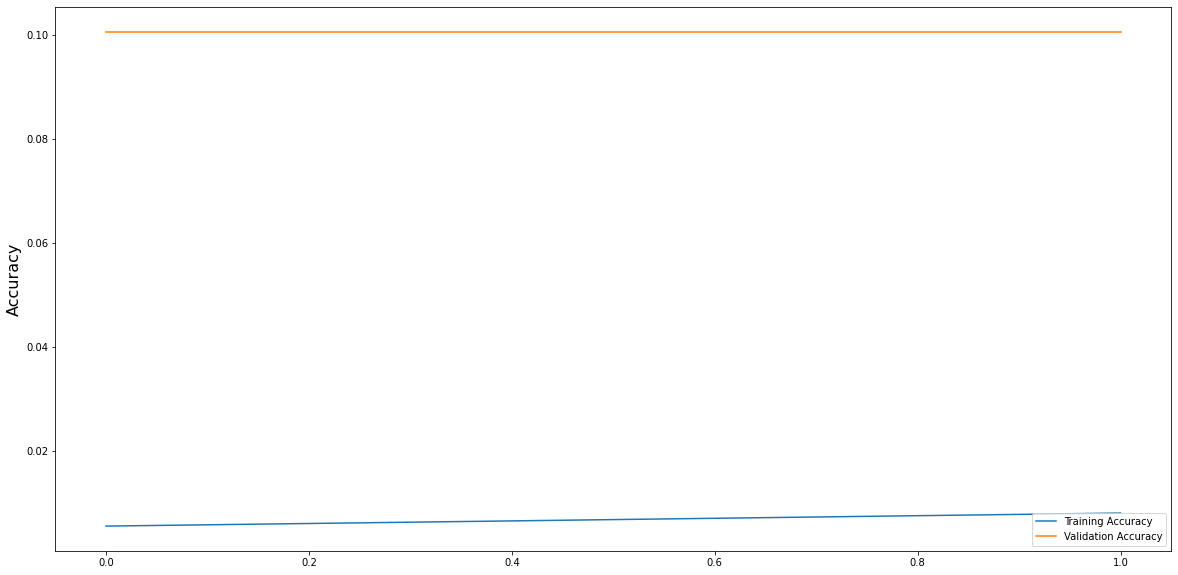

In [67]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG19 + BiLSTM

In [68]:
cnn_model = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = Bidirectional(LSTM(2048, return_sequences=True))(x)
rnn_output = Bidirectional(LSTM(2048))(x)

x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [69]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
model.summary()
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 299, 299, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 299, 299, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 149, 149, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________

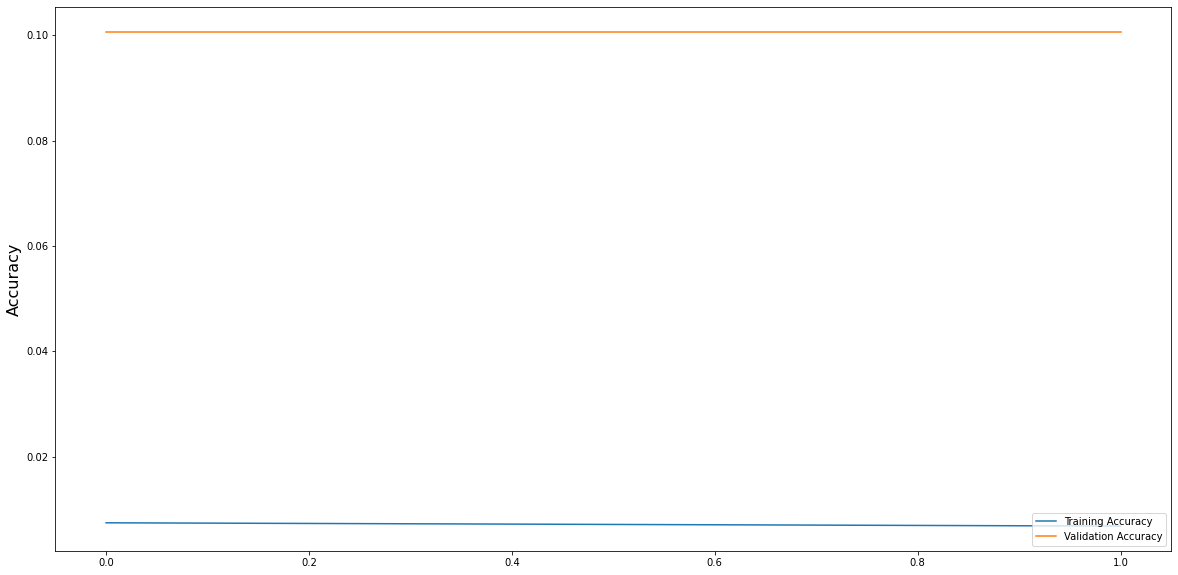

In [70]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG19 + GRU

In [71]:
cnn_model = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = GRU(2048, return_sequences=True)(x)
rnn_output = GRU(2048)(x)

x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [72]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
model.summary()
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 299, 299, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 299, 299, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 149, 149, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________

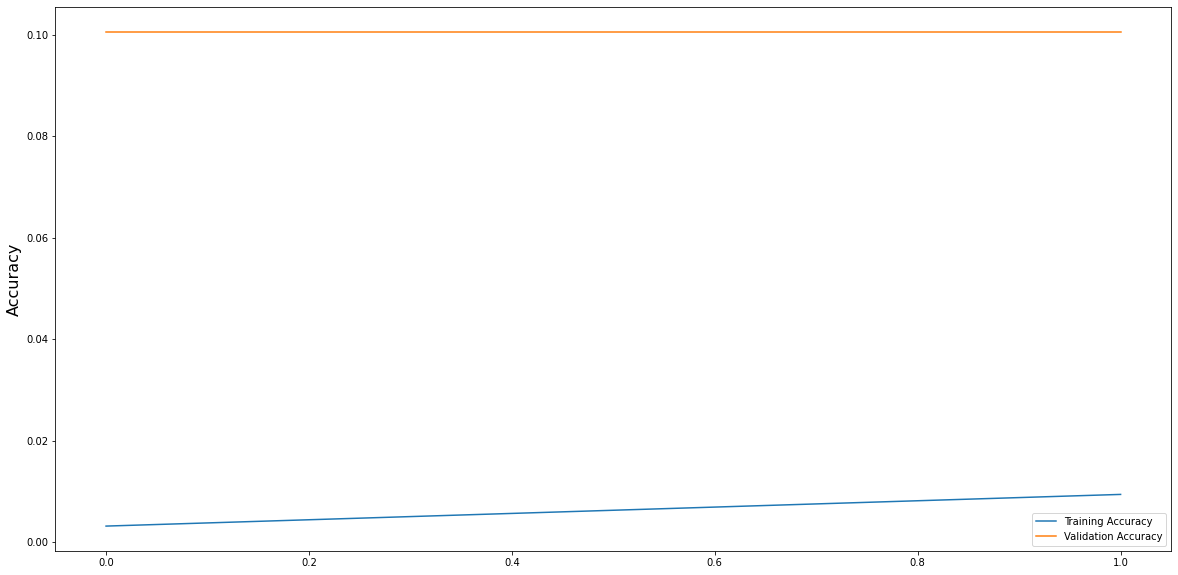

In [73]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()